In [ ]:
# Pre-load packages

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math



In [ ]:
# listings = pd.read_csv('montclair-properties.csv')

from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv(io.BytesIO(uploaded['montclair-properties.csv']))

In [ ]:
# Explore the first 5 rows

listings.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,14 Knollwood Dr,North Caldwell,NJ,07006,624900.0,3.0,2.0,North Caldwell,NaN,23800.0,NaN,71,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/NJ/Caldwell/14-Knollwood...,NJMLS,20008471,N,Y,40.859084,-74.255639
1,MLS Listing,NaN,Single Family Residential,215 LINDEN Ave,Verona Twp.,NJ,07044-1916,445000.0,4.0,2.0,Flood Insurance Required,NaN,8712.0,1957.0,1,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/NJ/Verona/215-Linden-Ave...,GSMLS,3631437,N,Y,40.836202,-74.244092
2,MLS Listing,NaN,Single Family Residential,28 Harriet St,West Orange,NJ,07052,374000.0,3.0,2.0,West Orange,NaN,8000.0,NaN,1,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/NJ/West-Orange/28-Harrie...,NJMLS,20015941,N,Y,40.801290,-74.235838
3,MLS Listing,NaN,Single Family Residential,248 S Mountain Ave,Montclair,NJ,07042,650000.0,5.0,4.5,Montclair,NaN,14301.0,NaN,1,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/NJ/Montclair/248-S-Mount...,NJMLS,20015937,N,Y,40.802996,-74.233408
4,MLS Listing,NaN,Single Family Residential,42 Birdseye Gln,Verona,NJ,07044,629000.0,3.0,2.5,Verona,NaN,7000.0,NaN,1,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/NJ/Verona/42-Birdseye-Gl...,NJMLS,20015909,N,Y,40.823715,-74.245559


In [ ]:
# Get a list of all column names

listings.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
# Drop unwanted columns

listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

In [ ]:
# Check non-null value distribution

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  350 non-null    object 
 1   PRICE          349 non-null    float64
 2   BEDS           340 non-null    float64
 3   BATHS          339 non-null    float64
 4   SQUARE FEET    67 non-null     float64
 5   LOT SIZE       240 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.5+ KB


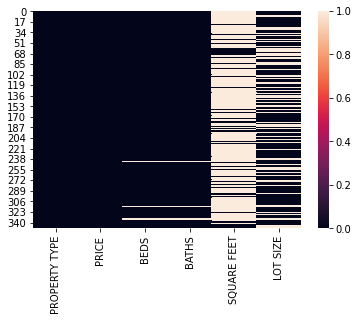

In [ ]:
# Explore missing values across features

sns.heatmap(listings.isnull(), cbar=True)

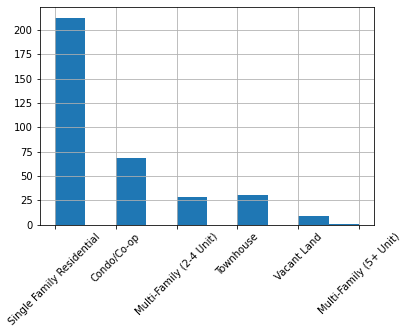

In [ ]:
# Explore frequency distribution of different property types

listings['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
listings['PROPERTY TYPE'].unique()

array(['Single Family Residential', 'Condo/Co-op',
       'Multi-Family (2-4 Unit)', 'Townhouse', 'Vacant Land',
       'Multi-Family (5+ Unit)'], dtype=object)

In [ ]:
property_types_to_remove = ['Vacant Land', 'Multi-Family (5+ Unit)']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

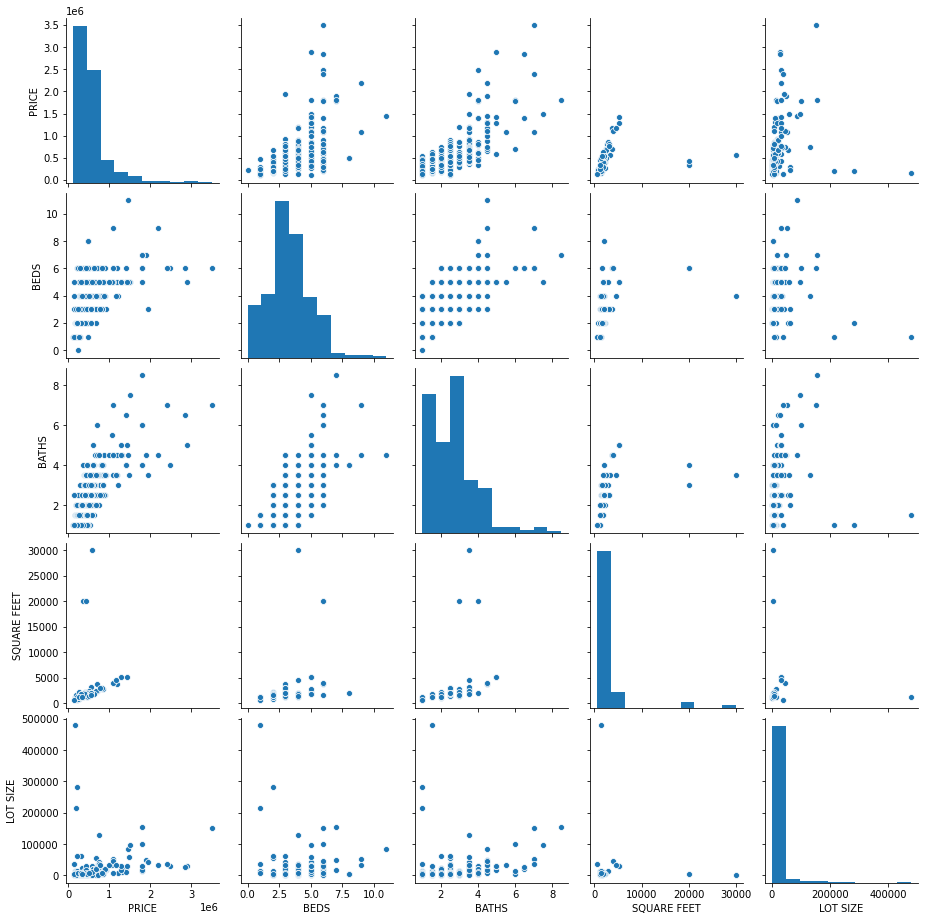

In [ ]:
sns.pairplot(listings)

In [ ]:
# Get summary statistics

listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.400000e+02,339.000000,339.000000,67.000000,236.000000
mean,5.606739e+05,3.516224,2.533923,2973.223881,18123.152542
std,4.406960e+05,1.561994,1.254412,4654.556802,42772.023053
min,1.070000e+05,0.000000,1.000000,590.000000,572.000000
25%,3.249750e+05,3.000000,1.500000,1326.000000,4791.000000
50%,4.494500e+05,3.000000,2.500000,1800.000000,7148.000000
75%,6.392500e+05,4.000000,3.000000,2500.000000,13939.000000
max,3.495000e+06,11.000000,8.500000,29997.000000,479160.000000


In [ ]:
# Filter out records matching criteria

listings.drop(listings[listings['SQUARE FEET'] > 4000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 100000 ].index, inplace=True)

In [ ]:
# Mean impute missing numeric values

imputed = listings.fillna(listings.mean())

In [ ]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.270000e+02,327.000000,327.000000,327.000000,327.000000
mean,5.411567e+05,3.481595,2.473926,1886.866667,11870.857143
std,3.989206e+05,1.534261,1.161800,327.364288,11406.581045
min,1.070000e+05,0.000000,1.000000,590.000000,572.000000
25%,3.249500e+05,3.000000,1.500000,1886.866667,5565.000000
50%,4.490000e+05,3.000000,2.500000,1886.866667,11870.857143
75%,6.290000e+05,4.000000,3.000000,1886.866667,11870.857143
max,2.895000e+06,11.000000,7.500000,4000.000000,97139.000000


In [ ]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [ ]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [ ]:
# Regression functional form
# Price = Intercept + b1*BEDS + b2*BATHS + b3*SqFt + b4*LotSize + b5*MFR + b6*SFR + b7*TownHouse

re_prices.intercept_

-324292.186922443

In [ ]:
re_prices.coef_

array([ 3.36335093e+04,  1.87450360e+05,  8.23253584e+01,  6.33036300e+00,
       -8.34063586e+04,  7.97591497e+04,  1.09442080e+04])

In [ ]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
90,2.0,1.0,1886.866667,7840.000000,0,0,0
164,2.0,1.0,750.000000,11870.857143,0,0,0
346,3.0,2.5,3047.000000,11870.857143,0,0,1
43,3.0,1.0,1886.866667,7540.000000,0,1,0
120,4.0,1.5,1886.866667,4500.000000,0,1,0


In [ ]:
# Additional information on regression model metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score  

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.5040388547337971
MAE:  164479.700851205
RMSE:  298101.73065930785
Max error:  1694404.8947826284
